In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets # import this to load the datasets
from sklearn import svm # import the classification model
from sklearn import model_selection # to load function for train test split
from sklearn import metrics # to evaluate performance of the model
from sklearn import tree

data=datasets.load_iris()
x=data.data
y=data.target
print(x.shape,y.shape)
data.feature_names

(150, 4) (150,)


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
r=0.4
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(x,y,test_size=r,random_state=65)

# Creating decision tree model
tree_model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=None)


tree_model = tree_model.fit(Xtrain,ytrain)
ypredTrain = tree_model.predict(Xtrain)
ypredTest = tree_model.predict(Xtest)

accTrain = metrics.accuracy_score(ypredTrain,ytrain)
accTest = metrics.accuracy_score(ypredTest,ytest)

print(accTrain)
print(accTest)

1.0
0.9666666666666667


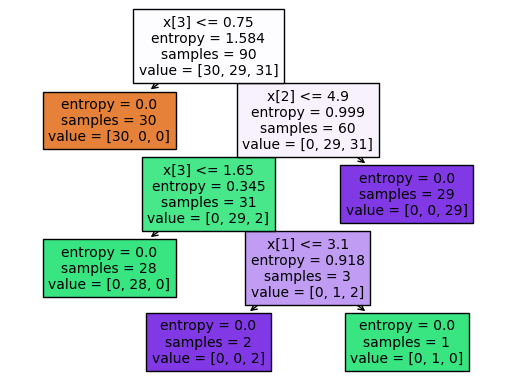

In [4]:
tree.plot_tree(tree_model,filled=True)
plt.show()

In [5]:
path = '/gdrive/MyDrive/Colab Notebooks/diabetes.csv'
data = pd.read_csv(path)
x=data.drop('Outcome',axis=1,inplace=False)
y=data['Outcome']
print(x.shape,y.shape)
data.head()

(768, 8) (768,)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
r=0.4
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(x,y,test_size=r,random_state=65)

# Creating decision tree model
tree_model = tree.DecisionTreeClassifier(splitter='best',criterion='log_loss',max_depth=10)


tree_model = tree_model.fit(Xtrain,ytrain)
ypredTrain = tree_model.predict(Xtrain)
ypredTest = tree_model.predict(Xtest)

accTrain = metrics.accuracy_score(ypredTrain,ytrain)
accTest = metrics.accuracy_score(ypredTest,ytest)

reportTrain = metrics.classification_report(ypredTrain,ytrain)
reportTest = metrics.classification_report(ypredTest,ytest)

print(accTrain)
print(accTest)
print(reportTrain,end="\n\n")
print(reportTest)


0.9586956521739131
0.7077922077922078
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       297
           1       0.94      0.94      0.94       163

    accuracy                           0.96       460
   macro avg       0.96      0.95      0.95       460
weighted avg       0.96      0.96      0.96       460


              precision    recall  f1-score   support

           0       0.78      0.77      0.78       204
           1       0.57      0.58      0.57       104

    accuracy                           0.71       308
   macro avg       0.67      0.68      0.67       308
weighted avg       0.71      0.71      0.71       308



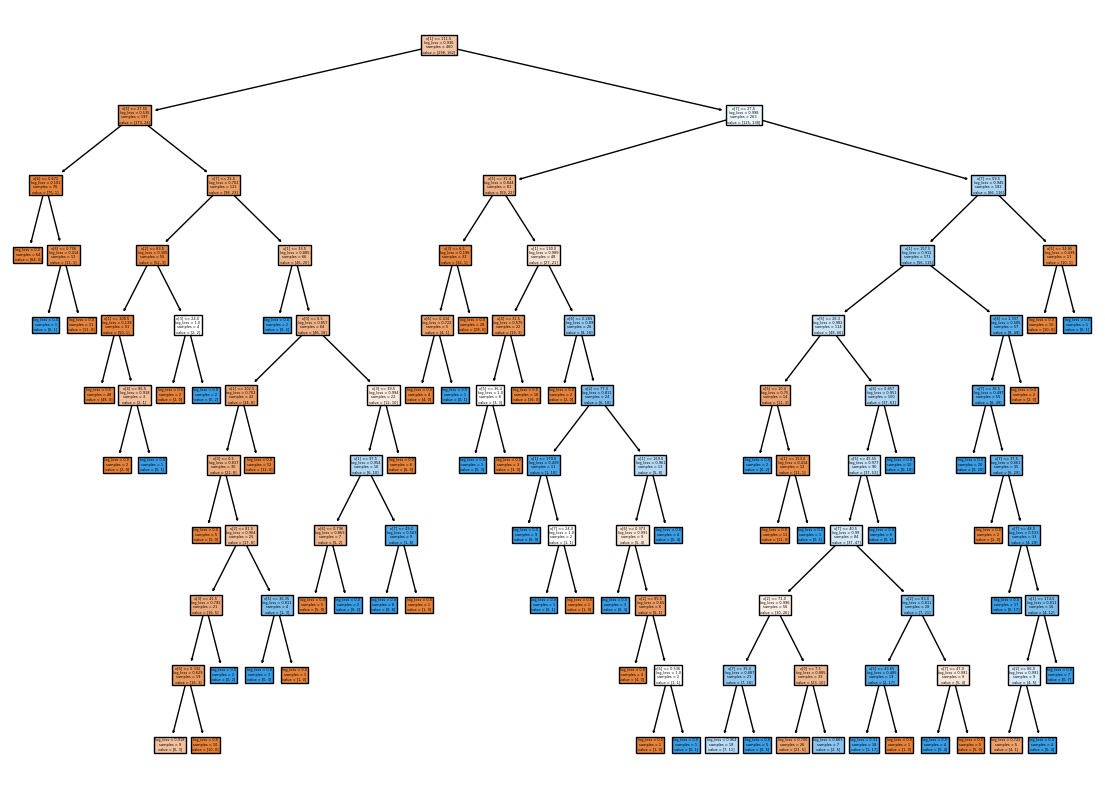

In [7]:
plt.figure(1,(14,10))
tree.plot_tree(tree_model,filled=True)
plt.show()

In [8]:
# !unzip '/gdrive/MyDrive/Colab Notebooks/orl_face.zip' -d '/gdrive/MyDrive/Colab Notebooks/orlfaces'

In [9]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
import numpy as np

<class 'numpy.ndarray'>
(112, 92)


(-0.5, 91.5, 111.5, -0.5)

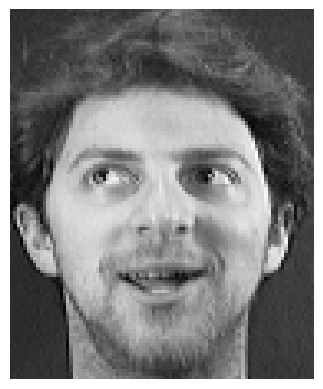

In [10]:
usr_name = 7
samp_no  = 6
path = "/gdrive/MyDrive/Colab Notebooks/orlfaces/orl_face/u%d/%d.png"%(usr_name,samp_no)

im=mimg.imread(path)



print(type(im))
print(im.shape)

plt.imshow(im,cmap='gray')
plt.axis('off')

In [11]:
# convert the 2D-data of image into 1-D features
feat = im.reshape(1,-1)# shift all the values of the image
#into the columns in one single row
print(im.shape)
print(feat.shape)
print("range:",im.min(),'-',im.max())

(112, 92)
(1, 10304)
range: 0.039215688 - 0.92156863


In [12]:
# logic to access all the samples of all
# the users
tot_samples = 400
data = np.zeros((tot_samples,im.shape[0]*im.shape[1]))
label = np.zeros((tot_samples))
images = np.zeros((tot_samples,im.shape[0],im.shape[1]))
indx=-1
for i in range(1,41,1): # to traverse users
  for j in range(1,11,1): # to traverse samples
    indx = indx+1
    # access any single image
    usr_name = i
    samp_no = j
    path = "/gdrive/MyDrive/Colab Notebooks/orlfaces/orl_face/u%d/%d.png"%(usr_name,samp_no)
    # read the image
    im = mimg.imread(path)
    feat = im.reshape(1,-1)
    data[indx,:]=feat
    label[indx]=i
    images[indx,:,:]=im
    # print("user num ",i,'samp no',j,'processed...')

In [13]:
# for i in range(25):
#   sample = np.random.randint(0,400)
#   sample_image = images[sample,:,:]
#   # label = y[sample]
#   plt.figure(1,(12,8))
#   plt.subplot(5,5,i+1)
#   plt.imshow(sample_image,cmap='gray')
#   plt.axis('off')
#   plt.title(sample)


In [14]:
# ind=0
# for i in range(5):
#   for j in range(5):
#     ind = ind+1
#     s = np.random.randint(0,400)
#     currIm = images[s,:,:]
#     currId = label[s]
#     plt.figure(1,(10,10))
#     plt.subplot(5,5,ind)
#     plt.imshow(currIm,cmap='gray')
#     plt.title(str(int(currId)))
#     plt.axis('off')



In [15]:
r=0.3
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(images,label,test_size=r,random_state=65)
# Xtrain = im.reshape(1,-1)
# ytrain = im.reshape(1,-1)
# Xtest = im.reshape(1,-1)
# ytest = im.reshape(1,-1)
Xtrain = Xtrain.reshape(Xtrain.shape[0], -1)
Xtest = Xtest.reshape(Xtest.shape[0], -1)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

clf_model = svm.SVC(kernel='rbf', gamma='scale', C=2)

clf_model = clf_model.fit(Xtrain,ytrain)

ypred = clf_model.predict(Xtest)

print(ypred.shape)
print(ytest.shape)

(280, 10304) (280,)
(120, 10304) (120,)
(120,)
(120,)


In [16]:
acc = metrics.accuracy_score(ypred,ytest)

# conf_matrix = metrics.confusion_matrix(ypred,ytest)

report = metrics.classification_report(ypred,ytest)
result=np.zeros((3,3))
# C_val=[1,2,3]
kern_val=["rbf","poly","linear"]

#CReate the svm classifier

for i in range(3):
  for j in kern_val:
    dibts_svm_model = svm.SVC(kernel=j,gamma='scale',C=i+1)
    dibts_svm_model = dibts_svm_model.fit(Xtrain,ytrain)
    ypred = dibts_svm_model.predict(Xtest)
    acc_val = metrics.accuracy_score(ypred,ytest)
    result[i][kern_val.index(j)]=acc_val




print('Accuracy of the system: ', acc)
print(result)

Accuracy of the system:  0.9666666666666667
[[0.85833333 0.96666667 0.975     ]
 [0.96666667 0.96666667 0.975     ]
 [0.96666667 0.96666667 0.975     ]]


In [17]:
import pandas as pd
df = pd.DataFrame(result,index=kern_val,columns=["C=1","C=2","C=3"])
print(df)

             C=1       C=2    C=3
rbf     0.858333  0.966667  0.975
poly    0.966667  0.966667  0.975
linear  0.966667  0.966667  0.975


In [ ]:
import joblib
# final best model
# kernel function - linear , C =1

orl_svm_model = svm.SVC(kernel='linear',gamma='scale',C=1)
# train the model
orl_svm_model = orl_svm_model.fit(Xtrain,ytrain)

# save the trained model
joblib.dump(orl_svm_model,'/gdrive/MyDrive/Colab Notebooks/orlfaces/orl_face/orl_face_model.pkl')
#

In [ ]:
# !unzip '/gdrive/MyDrive/Colab Notebooks/Brain/brain.zip' -d '/gdrive/MyDrive/Colab Notebooks/Brain'

<class 'numpy.ndarray'>
(512, 512, 3)


(-0.5, 511.5, 511.5, -0.5)

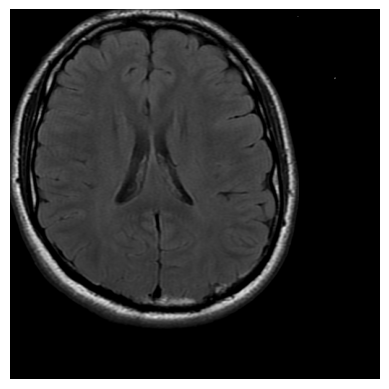

In [18]:
# usr_name = 7
samp_no  = 6
# path = "/gdrive/MyDrive/Colab Notebooks/orlfaces/orl_face/u%d/%d.png"%(usr_name,samp_no)
path = "/gdrive/MyDrive/Colab Notebooks/Brain/new_train/d(%d).png"%(samp_no)

im=mimg.imread(path)



print(type(im))
print(im.shape)

plt.imshow(im,cmap='gray')
plt.axis('off')

In [19]:
for i in range(1,62,1):
  plt.figure(1,(5,5))
  # plt.subplot(5,5,i)
  path = "/gdrive/MyDrive/Colab Notebooks/Brain/new_train/d(%d).png"%(i)
  im=mimg.imread(path)
  plt.imshow(im,cmap='gray')
  plt.axis('off')
  plt.title(i)
  plt.show()
  plt.pause(0.125)


Output hidden; open in https://colab.research.google.com to view.

In [27]:
def apass():
  im = mimg.imread('/content/d(S).png')
  #updated image
  im_new = im[:,:, 0] #= consider the first channel data
  feat = im_new.reshape(1,-1) # feature of the new image
  print(im_new.shape)
  plt.figure(1)
  plt.imshow(im,cmap='gray')
  plt.axis('off')